Size = 20


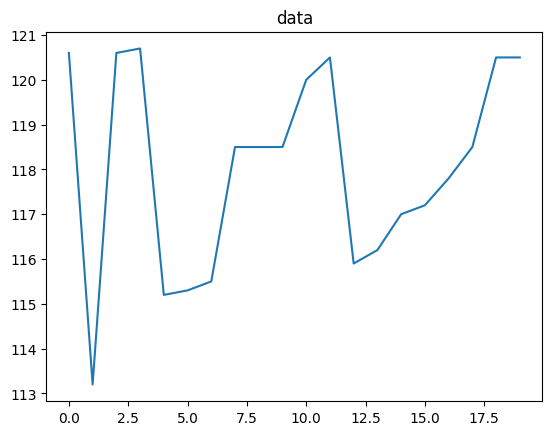

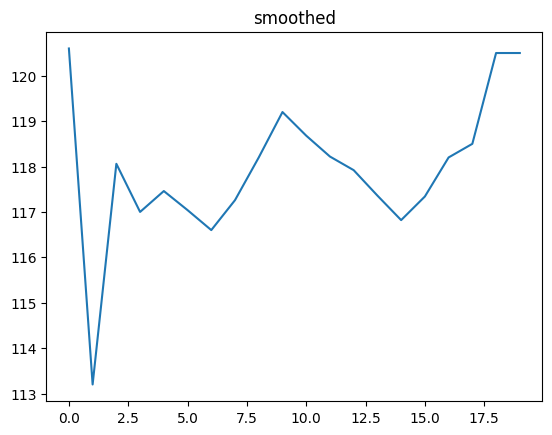

deleted smooth: [ 0.    0.    2.54  3.7  -2.26 -1.74 -1.1   1.24  0.3  -0.7   1.32  2.28
 -2.02 -1.16  0.18 -0.14 -0.4   0.    0.    0.  ]


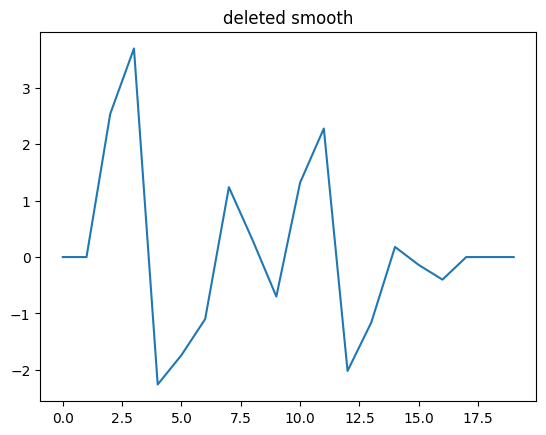

12


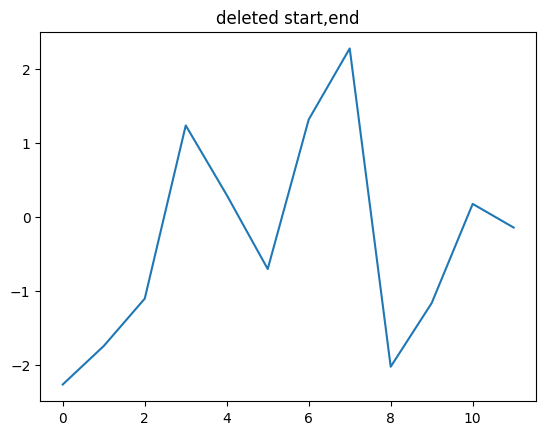

Средние для периода [-1.32666667 -1.2         0.13333333  1.12666667]
Общее среднее -0.31666666666666526
Условие: 2.3528342930262443 > 7.590991947598852
Сезнная волна [-1.01       -0.88333333  0.45        1.44333333]


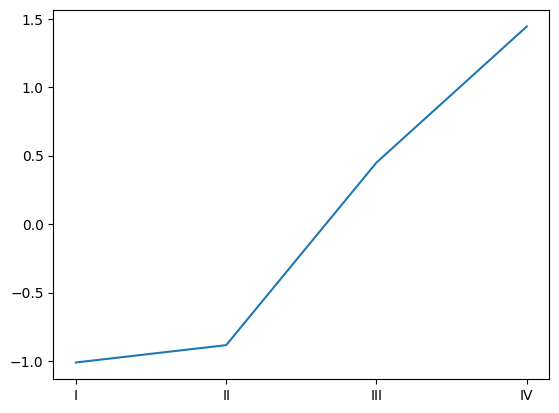

In [1]:
import numpy as np
import seaborn as sns
import statistics
import scipy.stats as stats
import matplotlib.pyplot as plt

x = [120.6, 113.2,  120.6, 120.7, 115.2, 115.3, 115.5,  118.5, 118.5,
     118.5, 120, 120.5, 115.9, 116.2, 117, 117.2, 117.8, 118.5, 120.5, 120.5]
data = np.array(x)
print("Size =", data.size)
sns.lineplot(data).set(title = "data")
plt.show()


def smooth_sma(series, *, m):
    smoothed_series = series.copy()
    k = m  // 2
    if m % 2 == 1:
        for t in range(k, len(series)-1-k):
            avg = sum(series[t-k : t+k+1]) / m
            smoothed_series[t] = avg
    else:
        for t in range(k, len(series)-1-k):
            avg = (series[t - k] / 2 + sum(series[t-k+1 : t+k]) + series[t + k] / 2) / m
            smoothed_series[t] = avg

    return smoothed_series




# Сглаживаем
smoothed = smooth_sma(data, m=5)
sns.lineplot(smoothed).set(title="smoothed")
plt.show()


# Удаляем сглаженные значения
wo_smooth = data - smoothed
print("deleted smooth:",wo_smooth)
sns.lineplot(wo_smooth).set(title="deleted smooth")
plt.show()
# удаляем начало и конец
e = np.array(wo_smooth[4:-4])
print(e.size)
sns.lineplot(e).set(title="deleted start,end")
plt.show()

# рассчитаем средние
n = e.size
t0 = 4
m = n / t0
e_monthavg = np.array([sum(e[j:n:4]) / m for j in range(t0)])
e_avg = sum(e) / e.size
print("Средние для периода",e_monthavg)
print("Общее среднее", e_avg)

# F критерий для проверки наличия сезонности
f_stat = m * (n - t0) / t0 * sum((e_monthavg[j] - e_avg)**2 for j in range(t0)) / sum((e[j] - e_monthavg[j % t0])**2 for j in range(n))
f_stat_table = stats.f.ppf(0.99, t0-1, n-t0)
print('Условие:', f_stat, '>', f_stat_table)
if f_stat > f_stat_table:
    print('Сезнонные колебания присутствуют с уровнем значимости 0.01')

# Сезонная волна (если присутствуют сезонные колебания)
e_monthavg -= e_avg
sns.lineplot(y=e_monthavg, x=["I","II","III","IV"])
print("Сезнная волна",e_monthavg)
